# Dimensionality Reduction Visualization

This notebook takes SciKit Learn examples of clustering techniques and dimensionality reduction, and visualizes them as interactive charts using Plotly (open source graphing tool).

- Learn more about SciKit Learn here: https://scikit-learn.org/stable/
- Learn more about Plotly here: https://plot.ly/python/

In [1]:
import plotly

In [2]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
init_notebook_mode(connected=True)

In [4]:
import pandas as pd

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import load_iris
dataset = load_iris()
df = pd.DataFrame(data= np.c_[dataset['data'], dataset['target']],
                     columns= dataset['feature_names'] + ['target'])

## PCA
- Source: https://scikit-learn.org/stable/auto_examples/decomposition/plot_incremental_pca.html#sphx-glr-auto-examples-decomposition-plot-incremental-pca-py
- Authors: Kyle Kastner
- License: BSD 3 clause

In [7]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA(n_components=2)
df = pd.concat([df, pd.DataFrame(data=pca.fit_transform(dataset['data']), columns=['pca1','pca2'])],axis=1)

In [12]:
df['sepal_ratio']=df['sepal length (cm)']/df['sepal width (cm)']
df['petal_ratio']=df['petal length (cm)']/df['petal width (cm)']

In [13]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pca1,pca2,sepal_ratio,petal_ratio
0,5.1,3.5,1.4,0.2,0.0,-2.684207,0.326607,1.457143,7.000000
1,4.9,3.0,1.4,0.2,0.0,-2.715391,-0.169557,1.633333,7.000000
2,4.7,3.2,1.3,0.2,0.0,-2.889820,-0.137346,1.468750,6.500000
3,4.6,3.1,1.5,0.2,0.0,-2.746437,-0.311124,1.483871,7.500000
4,5.0,3.6,1.4,0.2,0.0,-2.728593,0.333925,1.388889,7.000000
5,5.4,3.9,1.7,0.4,0.0,-2.279897,0.747783,1.384615,4.250000
6,4.6,3.4,1.4,0.3,0.0,-2.820891,-0.082105,1.352941,4.666667
7,5.0,3.4,1.5,0.2,0.0,-2.626482,0.170405,1.470588,7.500000
8,4.4,2.9,1.4,0.2,0.0,-2.887959,-0.570798,1.517241,7.000000
9,4.9,3.1,1.5,0.1,0.0,-2.673845,-0.106692,1.580645,15.000000


In [9]:
def generate_chart(title, measure=[]):
    data = []
    for i, target_name in zip([0, 1, 2], dataset.target_names):
        # Create a trace
        trace = go.Scatter(
            x = df[df['target']==i][measure[0]],
            y = df[df['target']==i][measure[1]],
            text = \
            'sepal length (cm): ' + df[df['target']==i]['sepal length (cm)'].map(str) + \
            '<br>sepal width (cm): ' + df[df['target']==i]['sepal width (cm)'].map(str) + \
            '<br>petal length (cm): ' +  df[df['target']==i]['petal length (cm)'].map(str) + \
            '<br>petal width (cm): ' + df[df['target']==i]['petal width (cm)'].map(str),
            hoverinfo = 'text',
            mode = 'markers',
            marker=dict(
                size=16
            ),
            name=target_name
        )
        data.append(trace)
    layout = go.Layout(title=title)
    fig = go.Figure(data=data, layout=layout)
    # Plot and embed in ipython notebook!
    iplot(fig)

In [10]:
generate_chart("PCA",['pca1','pca2'])

In [15]:
import json

In [16]:
with open('iris_pca.json', 'w') as outfile:  
    json.dump(df.to_json(orient='records'), outfile)

'[{"sepal length (cm)":5.1,"sepal width (cm)":3.5,"petal length (cm)":1.4,"petal width (cm)":0.2,"target":0.0,"pca1":-2.6842071251,"pca2":0.3266073148,"sepal_ratio":1.4571428571,"petal_ratio":7.0},{"sepal length (cm)":4.9,"sepal width (cm)":3.0,"petal length (cm)":1.4,"petal width (cm)":0.2,"target":0.0,"pca1":-2.7153906156,"pca2":-0.1695568476,"sepal_ratio":1.6333333333,"petal_ratio":7.0},{"sepal length (cm)":4.7,"sepal width (cm)":3.2,"petal length (cm)":1.3,"petal width (cm)":0.2,"target":0.0,"pca1":-2.8898195396,"pca2":-0.1373456096,"sepal_ratio":1.46875,"petal_ratio":6.5},{"sepal length (cm)":4.6,"sepal width (cm)":3.1,"petal length (cm)":1.5,"petal width (cm)":0.2,"target":0.0,"pca1":-2.7464371973,"pca2":-0.3111243158,"sepal_ratio":1.4838709677,"petal_ratio":7.5},{"sepal length (cm)":5.0,"sepal width (cm)":3.6,"petal length (cm)":1.4,"petal width (cm)":0.2,"target":0.0,"pca1":-2.7285929818,"pca2":0.3339245636,"sepal_ratio":1.3888888889,"petal_ratio":7.0},{"sepal length (cm)":5.4,

## LDA
- Source: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)

In [12]:
df = pd.concat([df, pd.DataFrame(data=lda.fit(dataset['data'], dataset['target']).transform(dataset['data']), columns=['lda1','lda2'])],axis=1)

In [13]:
generate_chart("LDA",['lda1','lda2'])

## Manifold Learning
- Source: https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py
- Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

standard: 0.17 sec
ltsa: 0.28 sec
hessian: 0.4 sec
modified: 0.3 sec
Isomap: 0.49 sec
MDS: 1.4 sec
SpectralEmbedding: 0.08 sec
t-SNE: 24 sec


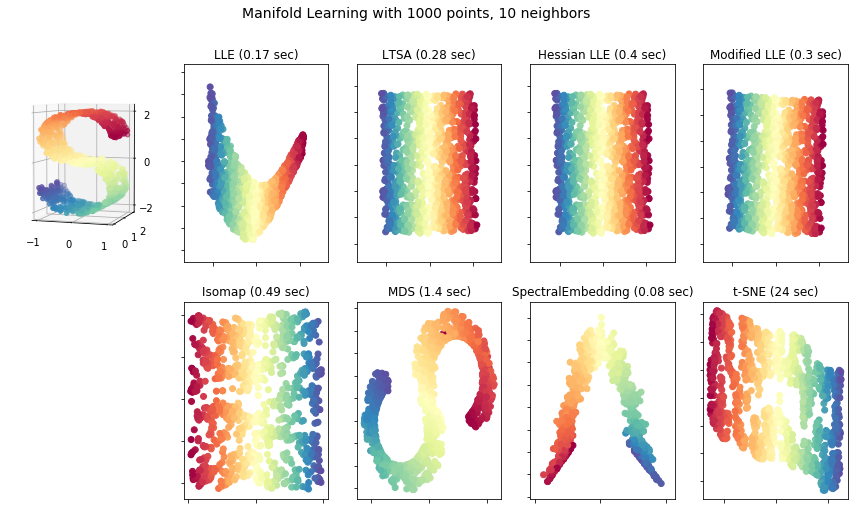

In [45]:
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()